In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 3/AA.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 3/AA.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 3/AA'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 3/AA   
1    P:/CoxaAI/Sortering 3/AA   
2    P:/CoxaAI/Sortering 3/AA   
3    P:/CoxaAI/Sortering 3/AA   
4    P:/CoxaAI/Sortering 3/AA   
..                        ...   
195  P:/CoxaAI/Sortering 3/AA   
196  P:/CoxaAI/Sortering 3/AA   
197  P:/CoxaAI/Sortering 3/AA   
198  P:/CoxaAI/Sortering 3/AA   
199  P:/CoxaAI/Sortering 3/AA   

                                              filename parent_name  \
0    1.2.276.0.95.33919.1.20220719.101043.0.2.7450.dcm  1-22066657   
1    1.2.276.0.95.33919.1.20220719.101043.0.2.7450.dcm  1-22066657   
2    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...  1-22113749   
3    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...  1-22113749   
4           1.2.276.0.95.17014.20230123.122956.0.0.dcm  1-22119050   
..                                                 ...         ...   
195  1.2.276.0.95.33780.1.20230123.144756.0.2.4951.dcm  1-23007932   
196  1.2.276.0.95.33780.1.20230123.145032.0.2.4952.dcm  1-23007932   
197  1.2.276.0.95.33780.1.20230123.145032.0.2.4952.dcm  1-23007932   
198  1.3.51.0.7.11094374637.36007.41545.46150.20431...  1-23008138   
199  1.3.51.0.7.11094374637.36007.41545.46150.20431...  1-23008138   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.95.33919.1.20220719.101043.0.2.7450....      779      947   
1    1.2.276.0.95.33919.1.20220719.101043.0.2.7450....      782      940   
2    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...     1263     1422   
3    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...     1255     1430   
4        1.2.276.0.95.17014.20230123.122956.0.0.dcm_h1      759      920   
..                                                 ...      ...      ...   
195  1.2.276.0.95.33780.1.20230123.144756.0.2.4951....     1236     1424   
196  1.2.276.0.95.33780.1.20230123.145032.0.2.4952....     1170     1355   
197  1.2.276.0.95.33780.1.20230123.145032.0.2.4952....     1160     1350   
198  1.3.51.0.7.11094374637.36007.41545.46150.20431...     1484     1751   
199  1.3.51.0.7.11094374637.36007.41545.46150.20431...     1518     1788   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0       1152     1274    0.970636       False          0            AA  
1        579      695    0.947698       False          0            AA  
2       1364     1482    0.972636       False          0            AA  
3        792      913    0.965367       False          0            AA  
4       1280     1396    0.963608       False          0            AA  
..       ...      ...         ...         ...        ...           ...  
195     1260     1395    0.919697       False          0            AA  
196      660      792    0.992280       False          0            AA  
197     1258     1393    0.929038       False          0            AA  
198     1139     1327    0.997656       False          0            AA  
199     1979     2171    0.988911       False          0            AA  

[200 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that all cases are good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

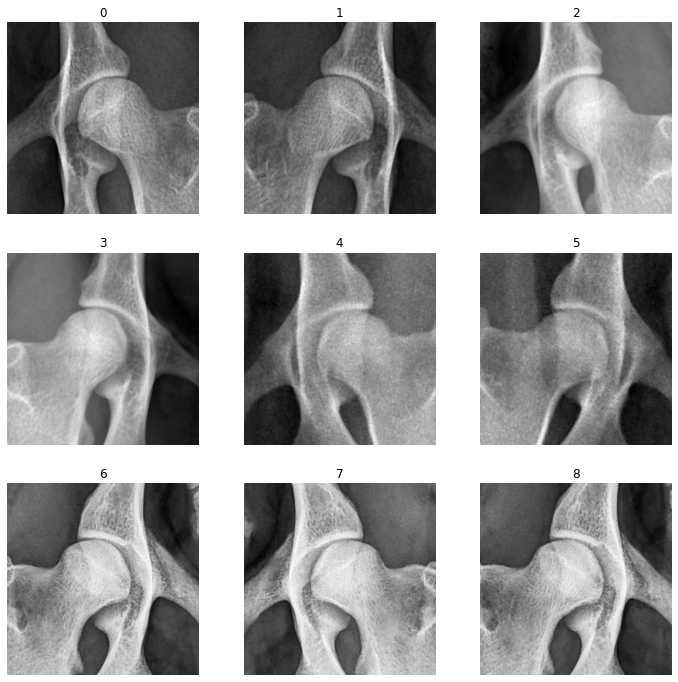

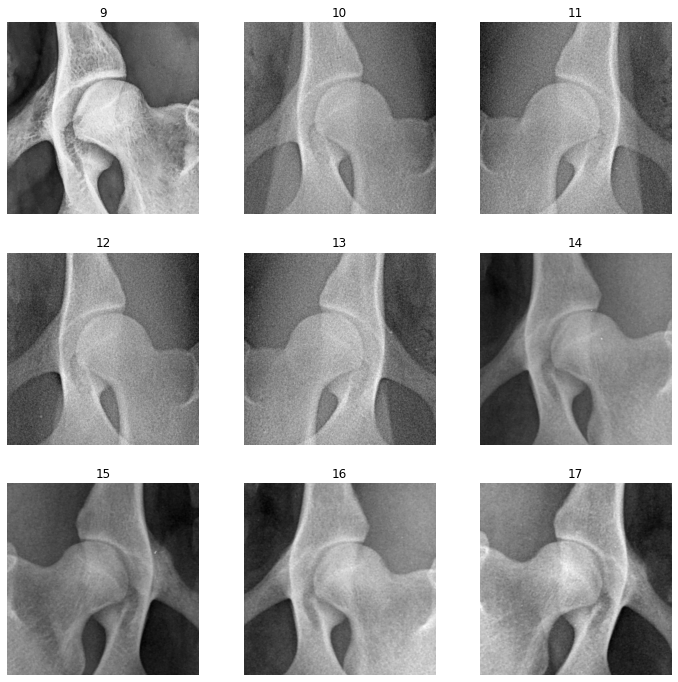

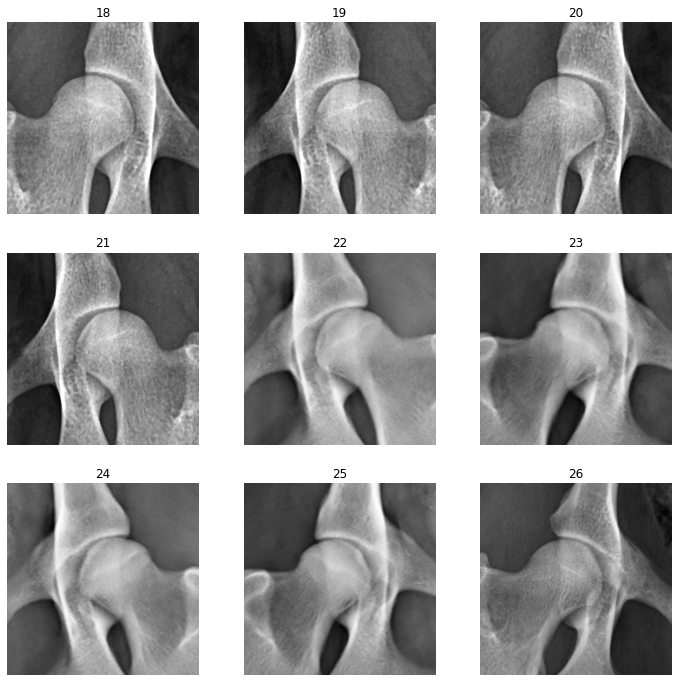

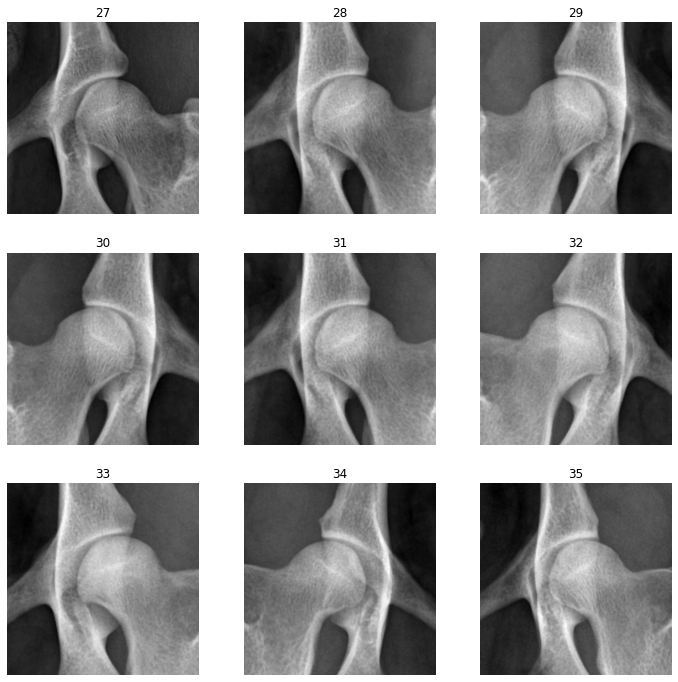

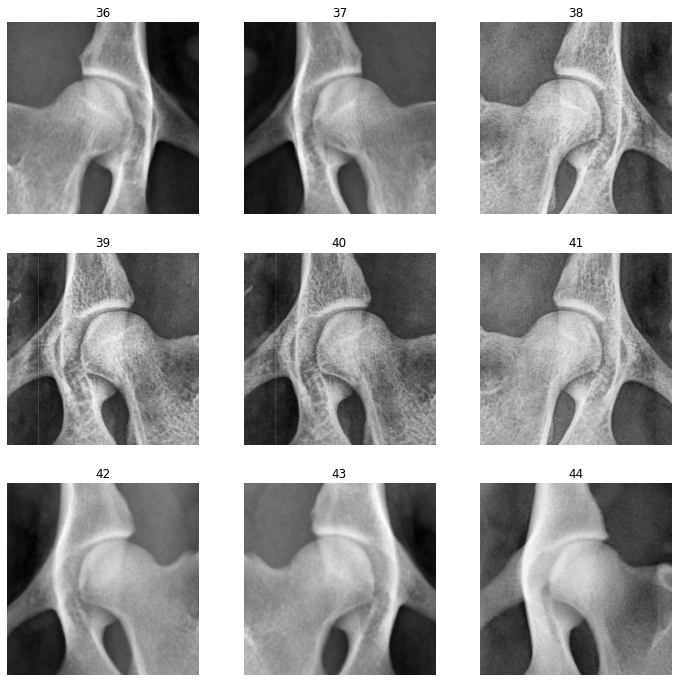

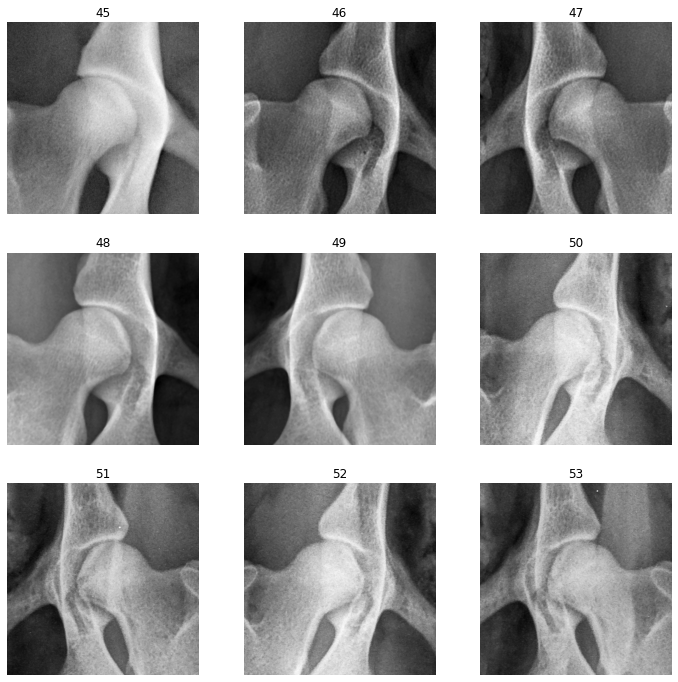

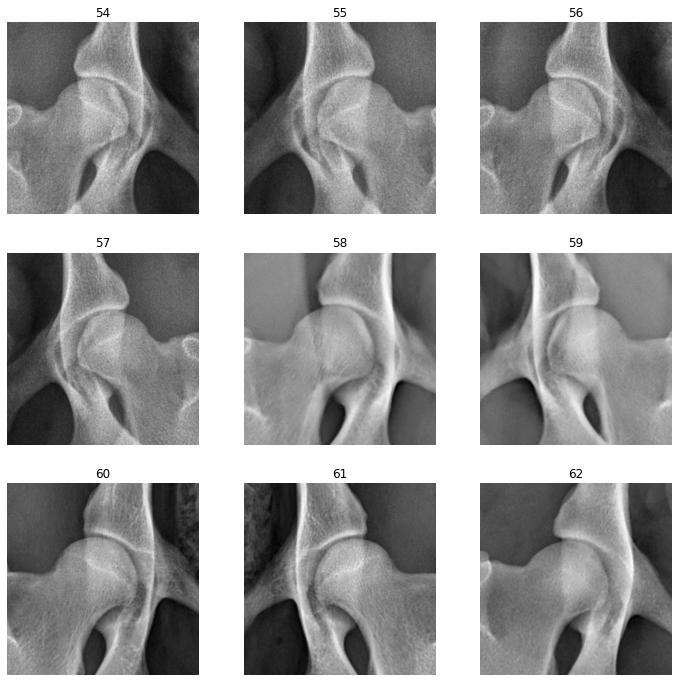

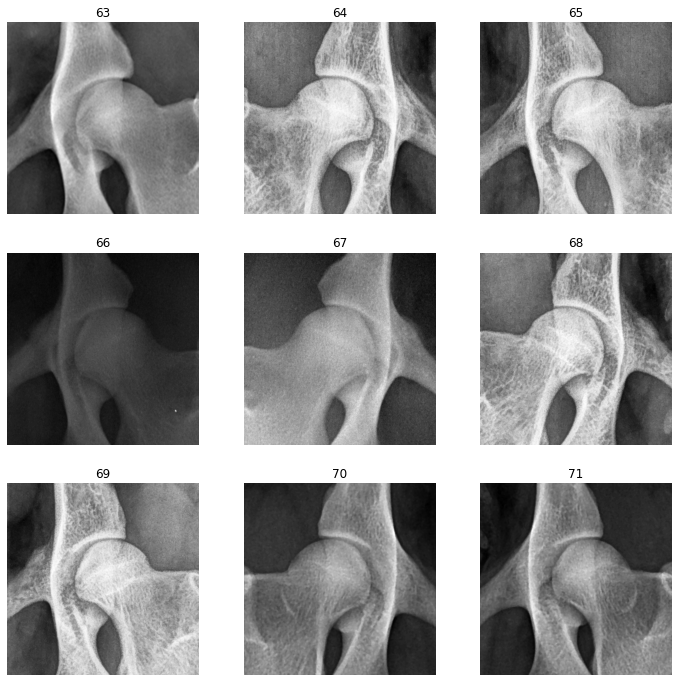

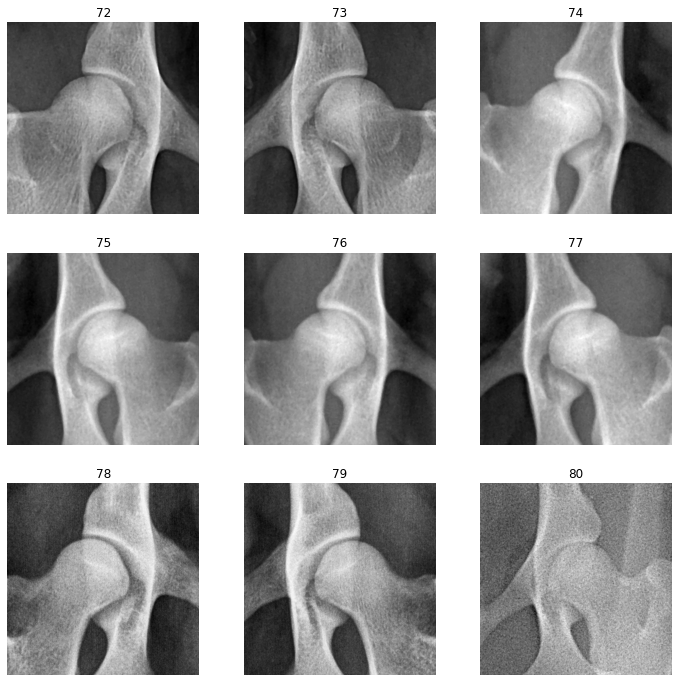

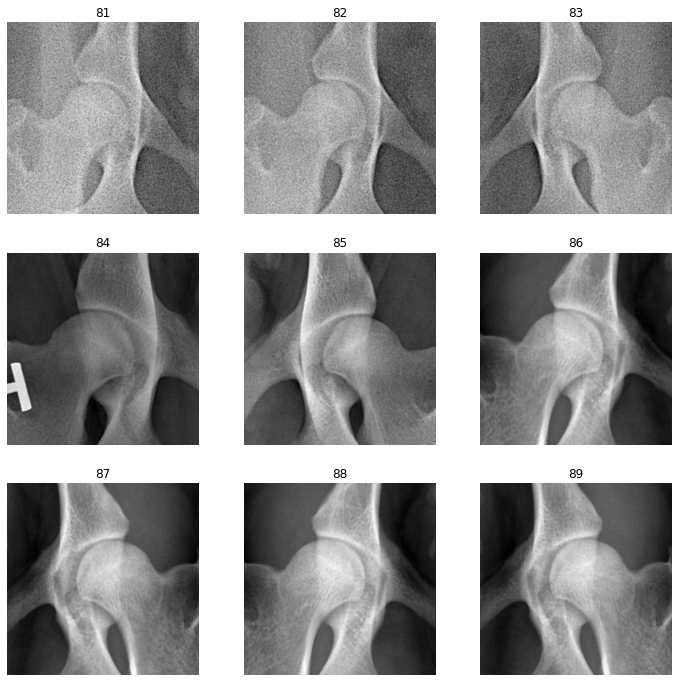

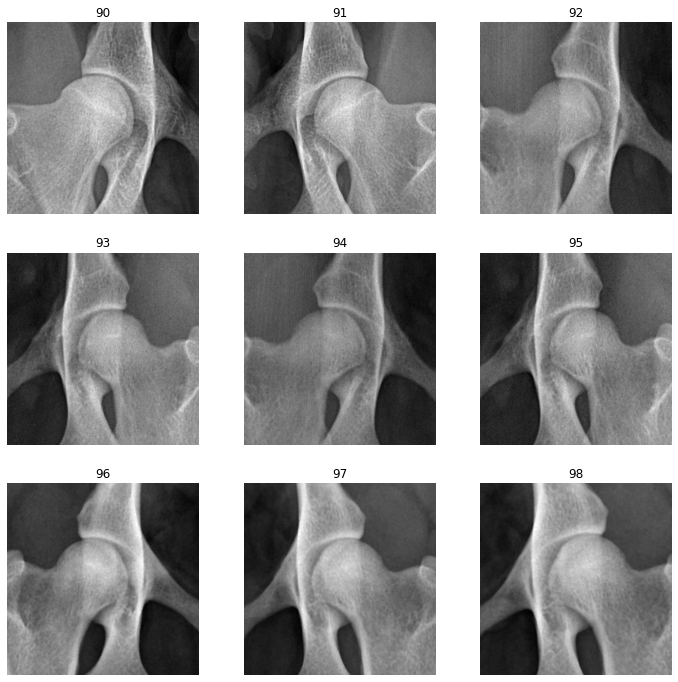

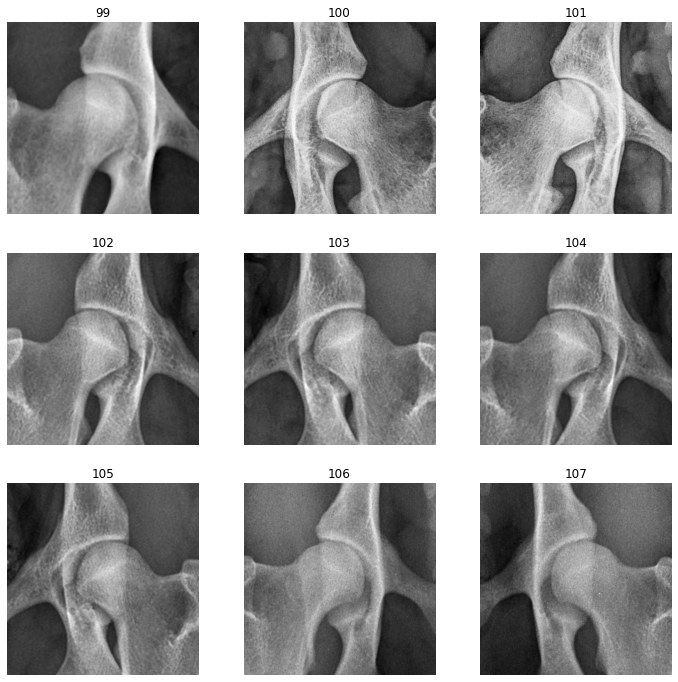

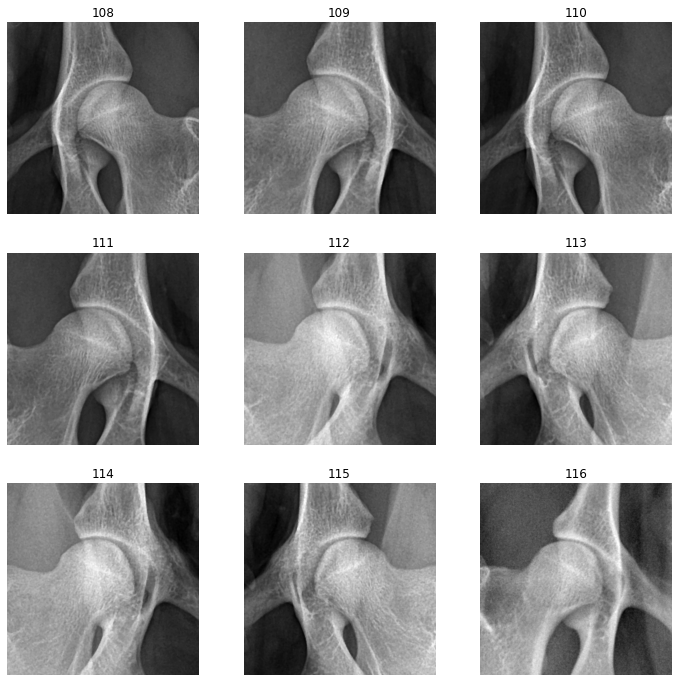

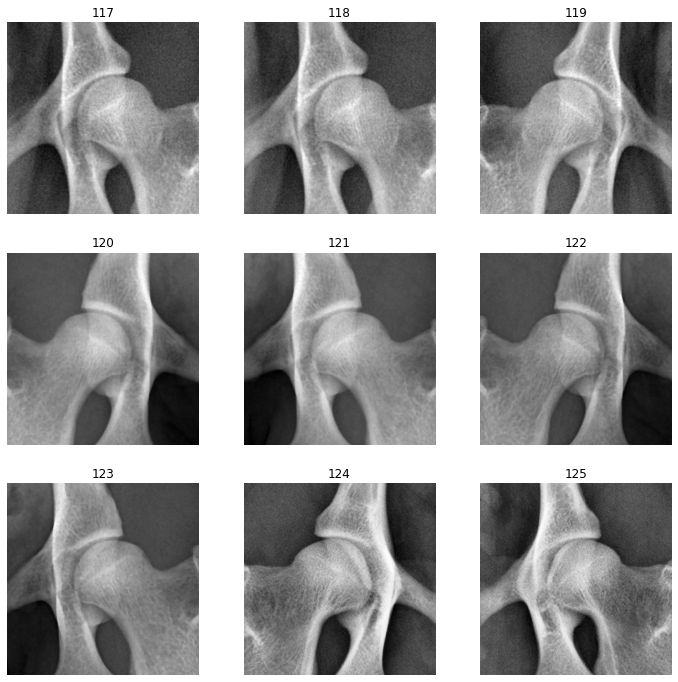

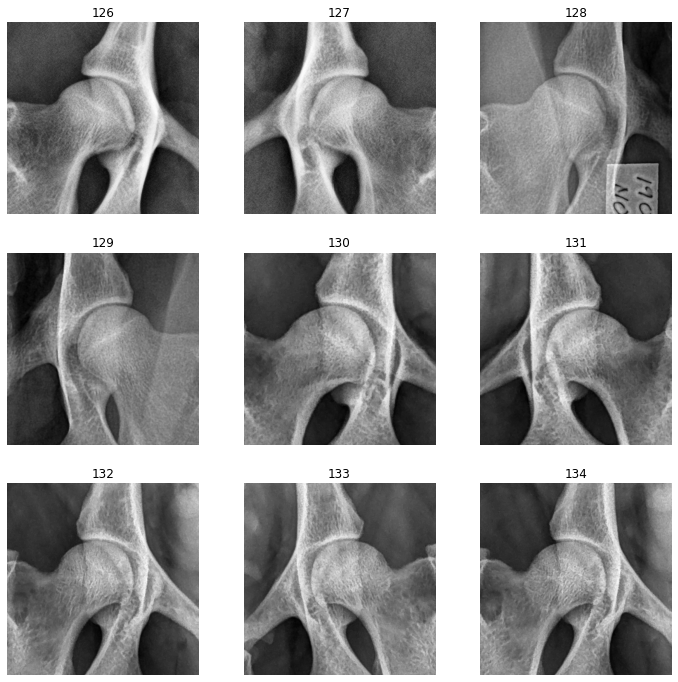

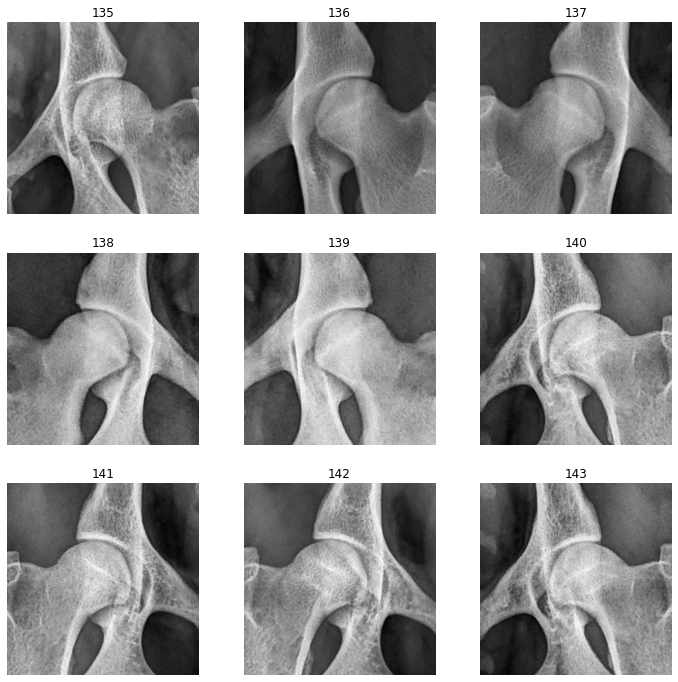

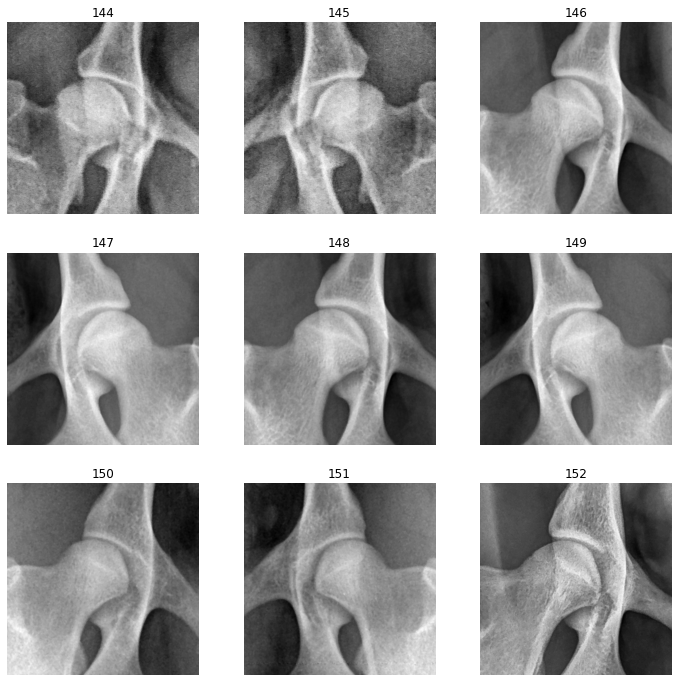

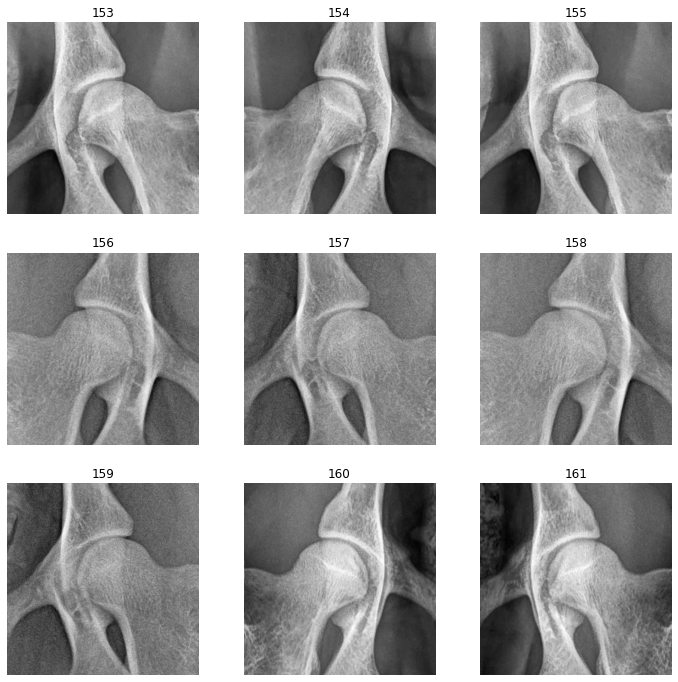

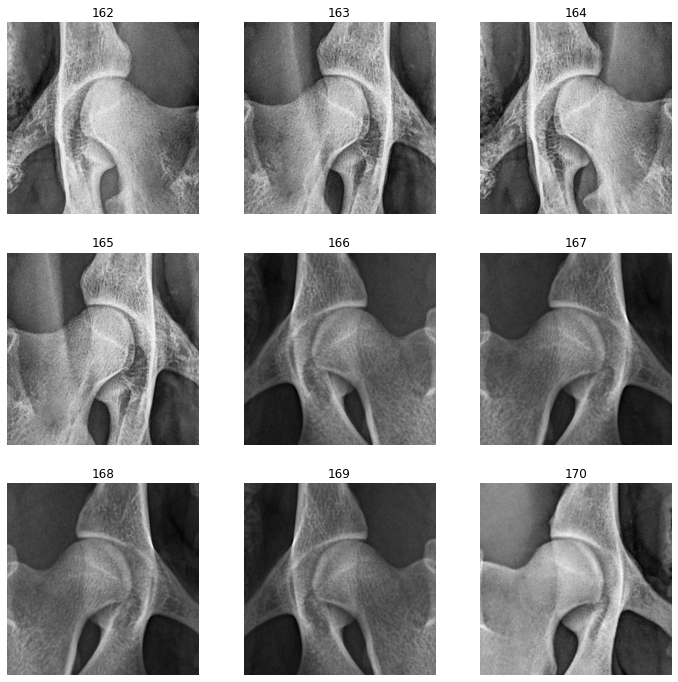

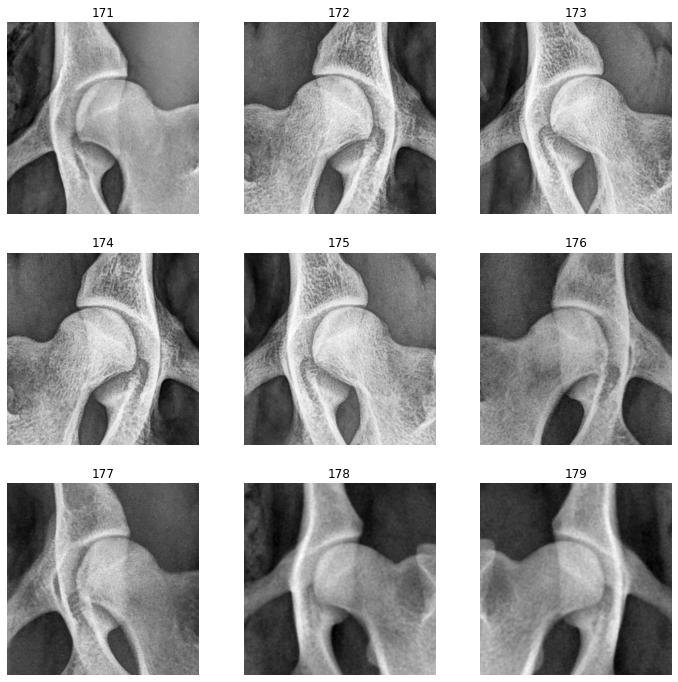

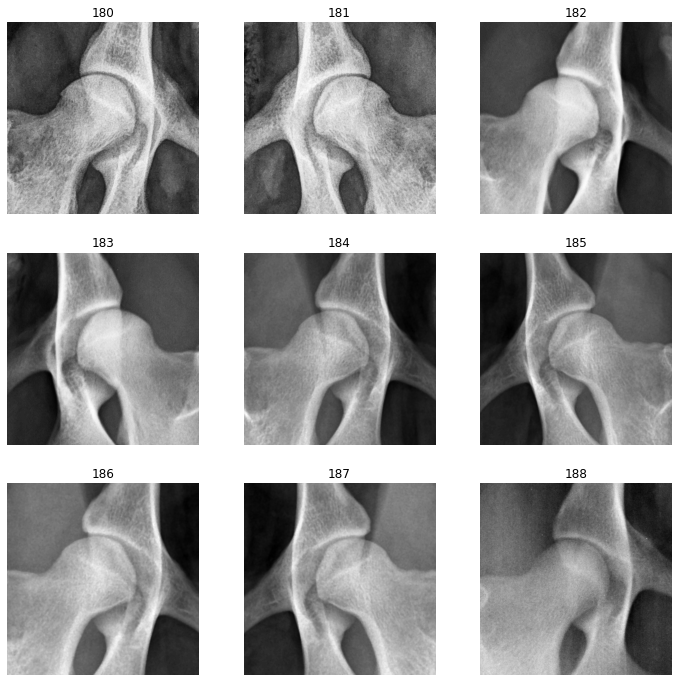

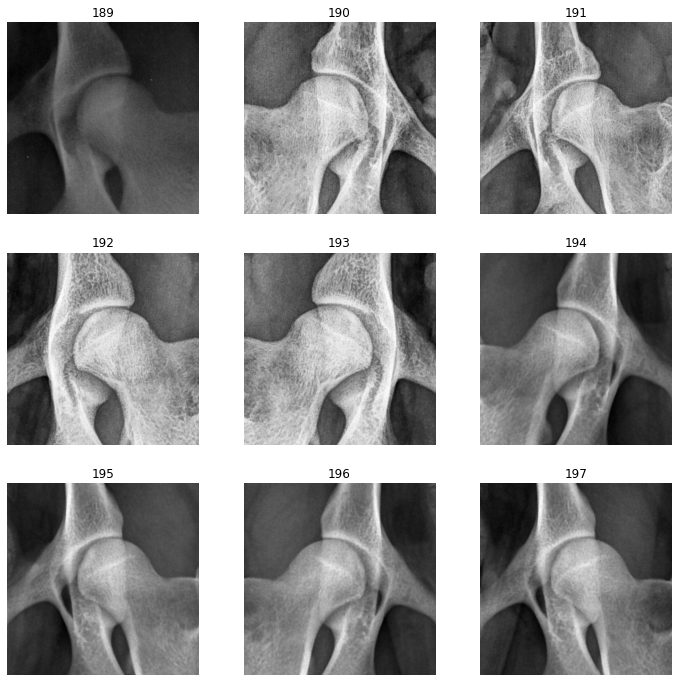

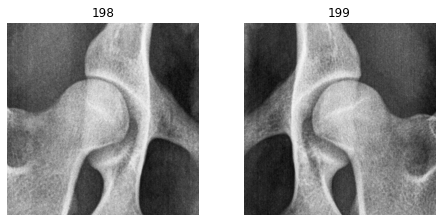

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = []
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = []
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 3/AA   
1    P:/CoxaAI/Sortering 3/AA   
2    P:/CoxaAI/Sortering 3/AA   
3    P:/CoxaAI/Sortering 3/AA   
4    P:/CoxaAI/Sortering 3/AA   
..                        ...   
195  P:/CoxaAI/Sortering 3/AA   
196  P:/CoxaAI/Sortering 3/AA   
197  P:/CoxaAI/Sortering 3/AA   
198  P:/CoxaAI/Sortering 3/AA   
199  P:/CoxaAI/Sortering 3/AA   

                                              filename parent_name  \
0    1.2.276.0.95.33919.1.20220719.101043.0.2.7450.dcm  1-22066657   
1    1.2.276.0.95.33919.1.20220719.101043.0.2.7450.dcm  1-22066657   
2    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...  1-22113749   
3    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...  1-22113749   
4           1.2.276.0.95.17014.20230123.122956.0.0.dcm  1-22119050   
..                                                 ...         ...   
195  1.2.276.0.95.33780.1.20230123.144756.0.2.4951.dcm  1-23007932   
196  1.2.276.0.95.33780.1.20230123.145032.0.2.4952.dcm  1-23007932   
197  1.2.276.0.95.33780.1.20230123.145032.0.2.4952.dcm  1-23007932   
198  1.3.51.0.7.11094374637.36007.41545.46150.20431...  1-23008138   
199  1.3.51.0.7.11094374637.36007.41545.46150.20431...  1-23008138   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.95.33919.1.20220719.101043.0.2.7450....      779      947   
1    1.2.276.0.95.33919.1.20220719.101043.0.2.7450....      782      940   
2    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...     1263     1422   
3    1.2.276.0.95.29091.1.20230124.101508.0.2.30494...     1255     1430   
4        1.2.276.0.95.17014.20230123.122956.0.0.dcm_h1      759      920   
..                                                 ...      ...      ...   
195  1.2.276.0.95.33780.1.20230123.144756.0.2.4951....     1236     1424   
196  1.2.276.0.95.33780.1.20230123.145032.0.2.4952....     1170     1355   
197  1.2.276.0.95.33780.1.20230123.145032.0.2.4952....     1160     1350   
198  1.3.51.0.7.11094374637.36007.41545.46150.20431...     1484     1751   
199  1.3.51.0.7.11094374637.36007.41545.46150.20431...     1518     1788   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0       1152     1274    0.970636       False          0            AA   
1        579      695    0.947698       False          0            AA   
2       1364     1482    0.972636       False          0            AA   
3        792      913    0.965367       False          0            AA   
4       1280     1396    0.963608       False          0            AA   
..       ...      ...         ...         ...        ...           ...   
195     1260     1395    0.919697       False          0            AA   
196      660      792    0.992280       False          0            AA   
197     1258     1393    0.929038       False          0            AA   
198     1139     1327    0.997656       False          0            AA   
199     1979     2171    0.988911       False          0            AA   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
195    False  
196    False  
197    False  
198    False  
199    False  

[200 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values

In [13]:
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]

In [14]:
new_detection_df.to_csv(filename_clean, index=False)

In [15]:
detection_df[detection_df.index.isin(remove_indice)]

Empty DataFrame
Columns: [base_path, filename, parent_name, crop_name, ax0_min, ax0_max, ax1_min, ax1_max, confidence, is_rotated, diagnosis, diagnosis_raw, flipped]
Index: []

In [16]:
for idx in exclude_ids:
     if idx.startswith('1-22') or idx.startswith('1-23'):
            print(idx)

In [17]:
for idx in new_detection_df.parent_name:
     if idx.startswith('1-18') or idx.startswith('1-19') or idx.startswith('1-20') or idx.startswith('1-21'):
            print(idx)